In [152]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.7.1+cu118'

## Get Data

In [153]:
weights = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weights * X + bias

X.size(), X[:10], y[:10]

(torch.Size([50, 1]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [154]:
train_split = int(len(X) * 0.8)

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [155]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
    
    """
    Plots the training, test and predictions
    """

    plt.scatter(train_data, train_label, c='r', s=4, label="Training data")

    plt.scatter(test_data, test_label, c='b', s=4, label="Testing data")

    if predictions is not None :

        plt.scatter(test_data, predictions, c='black', s=4, label="Predictions")

    plt.legend(prop={"size" : 14})

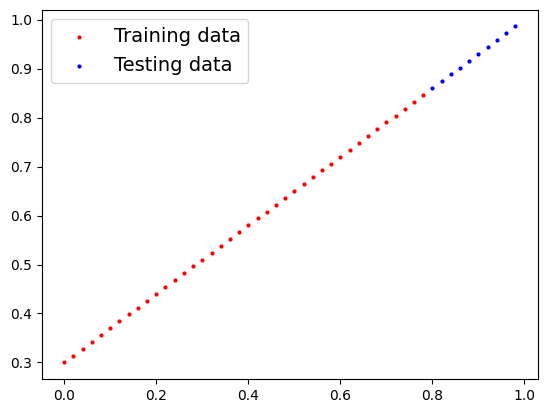

In [156]:
plot_predictions(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label=y_test)

## Build Model

In [157]:
class LinearRegressionModel(nn.Module):

    def __init__(self):
        
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float),
                                                requires_grad=True)
        

        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float),
                                             requires_grad=True)
        
    def forward(self, x: torch.tensor) -> torch.tensor:

            return self.weights * x + self.bias

In [158]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

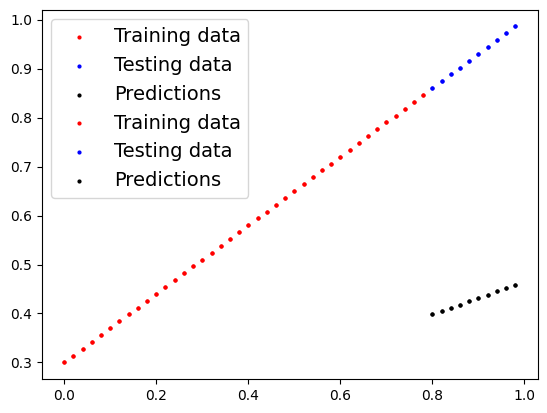

In [159]:
# make predictions on test data

with torch.inference_mode():

    y_preds = model_0(X_test)

plot_predictions(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label=y_test,
                 predictions=y_preds)


with torch.no_grad():

    y_preds = model_0(X_test)

plot_predictions(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label=y_test,
                 predictions=y_preds)

In [186]:
# let's create the loss function and optimizer

loss_fn = torch.nn.L1Loss()

optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.001)

In [187]:
def Fit(epochs):

    torch.manual_seed(42)

    train_loss_values = []
    test_loss_values = []
    epoch_count = []

    for epoch in range(epochs):

        model_0.train()

        y_pred = model_0(X_train)

        loss = loss_fn(y_pred, y_train)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()


        # TESTING

        model_0.eval()

        with torch.inference_mode():

            test__pred = model_0(X_test)

            test_loss = loss_fn(test__pred, y_test.type(torch.float))

        if epoch % 10 == 0:

            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} ----- | MAE Train Loss: {loss} ----- | MAE Test Loss: {test_loss}")

    return train_loss_values, test_loss_values, epoch_count

In [188]:
train_loss_values, test_loss_values, epoch_count = Fit(epochs=200)
epoch_count, train_loss_values, test_loss_values

Epoch: 0 ----- | MAE Train Loss: 0.0026428631972521544 ----- | MAE Test Loss: 0.0016382992034778
Epoch: 10 ----- | MAE Train Loss: 3.6536901461659e-05 ----- | MAE Test Loss: 0.00033068060292862356
Epoch: 20 ----- | MAE Train Loss: 0.00011873171024490148 ----- | MAE Test Loss: 0.0002173781394958496
Epoch: 30 ----- | MAE Train Loss: 0.00010758116695797071 ----- | MAE Test Loss: 0.00012469888315536082
Epoch: 40 ----- | MAE Train Loss: 4.1127950680674985e-05 ----- | MAE Test Loss: 2.993941234308295e-05
Epoch: 50 ----- | MAE Train Loss: 0.00012165233783889562 ----- | MAE Test Loss: 0.00017824769020080566
Epoch: 60 ----- | MAE Train Loss: 3.34717333316803e-05 ----- | MAE Test Loss: 8.207559403672349e-06
Epoch: 70 ----- | MAE Train Loss: 0.0001231014757649973 ----- | MAE Test Loss: 0.00018438100232742727
Epoch: 80 ----- | MAE Train Loss: 3.225654290872626e-05 ----- | MAE Test Loss: 5.251169113762444e-06
Epoch: 90 ----- | MAE Train Loss: 0.00012303963012527674 ----- | MAE Test Loss: 0.00018479

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [array(0.00264286, dtype=float32),
  array(3.65369e-05, dtype=float32),
  array(0.00011873, dtype=float32),
  array(0.00010758, dtype=float32),
  array(4.112795e-05, dtype=float32),
  array(0.00012165, dtype=float32),
  array(3.3471733e-05, dtype=float32),
  array(0.0001231, dtype=float32),
  array(3.2256543e-05, dtype=float32),
  array(0.00012304, dtype=float32),
  array(3.1992047e-05, dtype=float32),
  array(0.00012291, dtype=float32),
  array(3.1851232e-05, dtype=float32),
  array(0.00012288, dtype=float32),
  array(3.1738728e-05, dtype=float32),
  array(0.00012282, dtype=float32),
  array(3.163293e-05, dtype=float32),
  array(0.00012276, dtype=float32),
  array(3.1570344e-05, dtype=float32),
  array(0.00012276, dtype=float32)],
 [array(0.0016383, dtype=float32),
  array(0.00033068, dtype=float32),
  array(0.00021738, dtype=float32),
  array(0.0001247, d

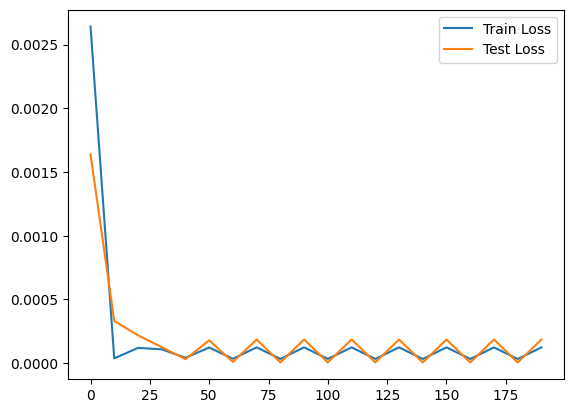

In [191]:
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.legend()

# test_loss_values, train_loss_values

In [192]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3000]))])

In [196]:
model_0.eval()

with torch.inference_mode():

    y_pred = model_0(X_test)
y_pred

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

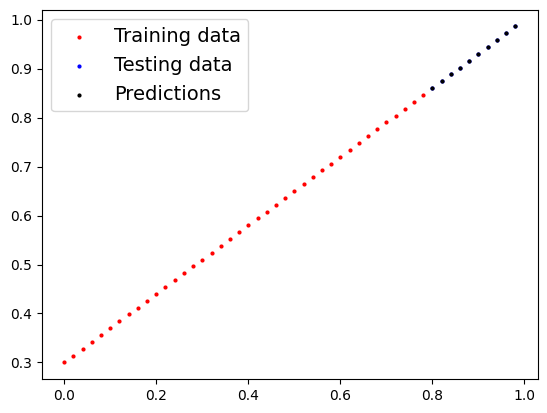

In [197]:
plot_predictions(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label=y_test,
                 predictions=y_pred.detach().numpy())

## Saving model

In [209]:
from pathlib import Path


# create directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pt


## Loading model

In [211]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

### Let's perform inference

In [217]:
loaded_model_0.eval()

with torch.inference_mode():

    loaded_model_preds = loaded_model_0(X_test)


## This confirms that loaded model predictions are same as the one which has been trained already

loaded_model_preds == y_pred 

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])